In [ ]:
KODE PYTHON CLUSTERING NASABAH

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [67]:
#CLUSTERING MENGGUNAKAN K-MEANS¶
#ambil data
data= pd.read_excel('Nasabah.xlsx')
print(data)

  Nasabah  Gaji(juta)  Nilai aset (x 100 juta)  Jumlah Kendaraan Cluster
0       A           4                        1                 3  sedang
1       B           3                        4                 3    kaya
2       C           2                        5                 3    kaya
3       D           3                        1                 3  sedang
4       E           4                        4                 2    kaya
5       F           3                        1                 2  sedang
6       G           2                        4                 1  miskin
7       H           2                        2                 1  miskin
8       I           1                        2                 1  miskin


In [17]:
#MENAMPILKAN DATA SECARA VISUAL DALAM VECTOR SPACE
#Ambil bagian data dari dataset
X = np.array(data.iloc[:, 1:4])

In [21]:
#mengambil semua baris, khusus mulai kolom ke-1 dari 4 kolom
print("Bagian data : ")
print(X)

Bagian data : 
[[4 1 3]
 [3 4 3]
 [2 5 3]
 [3 1 3]
 [4 4 2]
 [3 1 2]
 [2 4 1]
 [2 2 1]
 [1 2 1]]


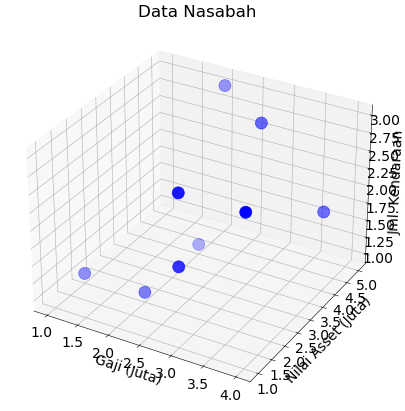

In [55]:
#Membuat grafik data
# 1. Memindah tiap kolom data ke variabel grafik
x1 = np.array(data.iloc[:, 1])
x2 = np.array(data.iloc[:, 2])
x3 = np.array(data.iloc[:, 3])
#2. menyiapkan grafik data
ax = plt.axes(projection ='3d') #ax adalah objek 3d yang akan ditaruh di grafik data
# 3. Mendefining axes
ax.set_xlabel('Gaji (Juta)')
ax.set_ylabel('Nilai Asset (Juta)')
ax.set_zlabel('Jml. Kendaraan')
# mendefinisikan warna
ax.scatter(x1, x2, x3, s=300, c = 'blue')
#data x,y, dan z ditempelkan di objek ax dan mendefinisikan ukuran grafik
plt.rcParams["figure.figsize"] = (15, 15)
plt.rcParams["figure.dpi"] = 50
# 4. Menampilkan grafik
plt.title('Data Nasabah')
plt.show()

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

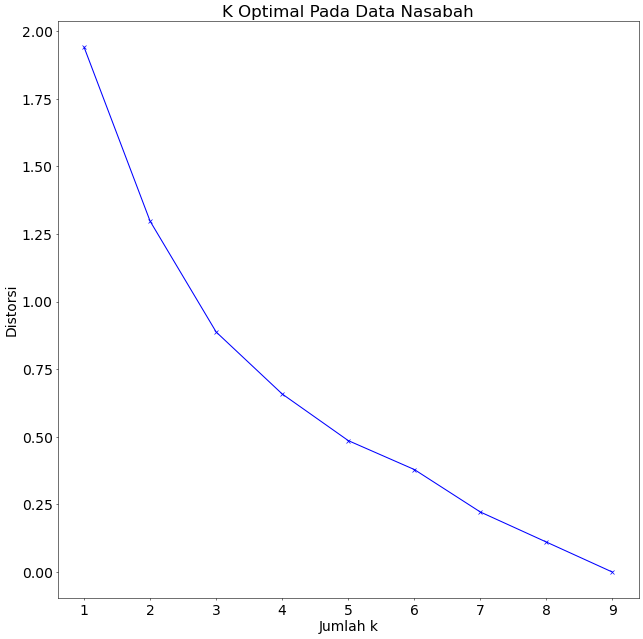

In [57]:
#MENCARI JUMLAH K OPTIMAL PADA KMEANS DENGAN METODE ELBOW¶
# menentukan jumlah k terbaik
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Menggambar elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Distorsi')
plt.title('K Optimal Pada Data Nasabah')

# Mendefinisikan ukuran grafik dan font
plt.rcParams["figure.figsize"] = (15, 15)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.size"] = "20"
plt.show()

In [ ]:
pip install yellowbrick

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Cluster terbaik menurut Silhouette:  3


D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

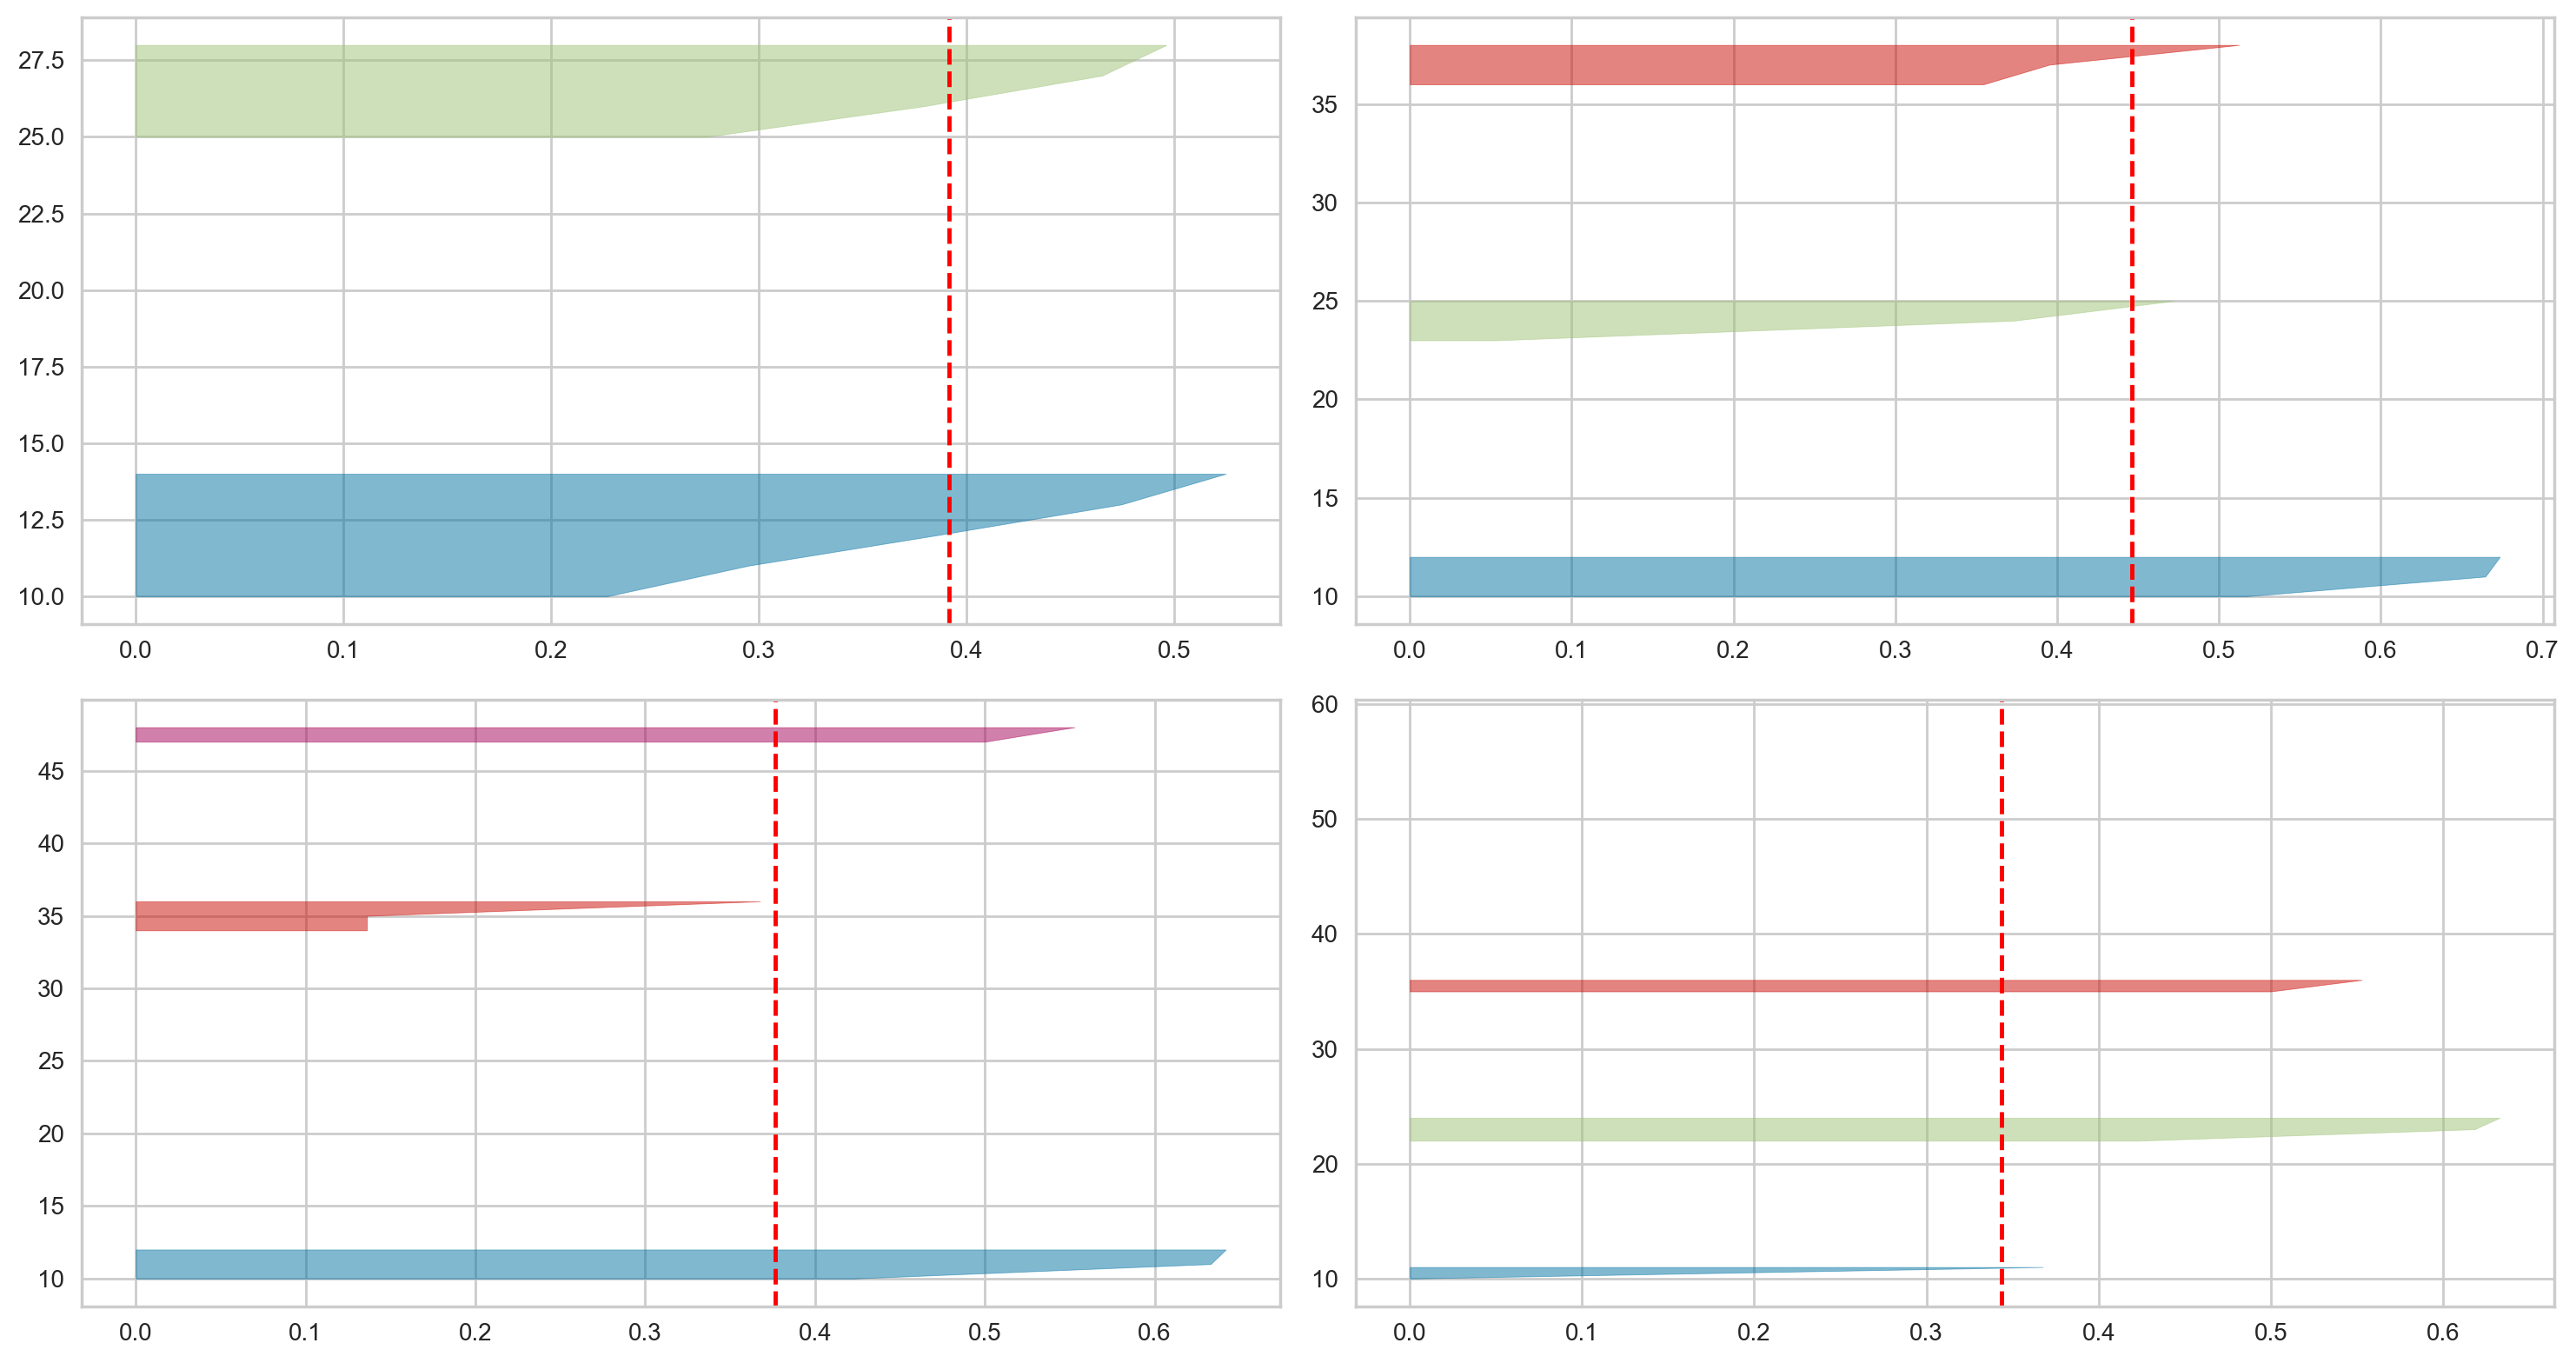

In [61]:
# MENCARI JUMLAH K OPTIMAL PADA KMEANS DENGAN METODE SILHOUETTE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def silhouette(train_class):
    silhouette_scores = []
    for n_cluster in range(2, 6):
        # Mendapatkan silhouette score untuk setiap n_cluster
        score = silhouette_score(train_class, KMeans(n_clusters=n_cluster).fit_predict(train_class))
        silhouette_scores.append(score)
    
    # Menentukan cluster terbaik berdasarkan nilai maksimum silhouette score
    max_score = silhouette_scores.index(max(silhouette_scores)) + 2
    return max_score

# Memanggil fungsi dan mencetak hasil
print('Cluster terbaik menurut Silhouette: ', silhouette(X))

# MENCARI JUMLAH K OPTIMAL PADA KMEANS DENGAN METODE SILHOUETTE VISUAL
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Membuat subplots untuk visualisasi Silhouette
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Melakukan iterasi untuk jumlah cluster dari 2 hingga 5
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-2, 2)  # Mengatur posisi subplot (q: row, mod: column)
    
    # Membuat visualisasi Silhouette untuk setiap K
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)  # Memasukkan data untuk visualisasi

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


In [63]:
#Tahap Clustering K-Means¶
# Preprocessing: Normalisasi data dengan Min Max Scaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[1.        , 0.        , 1.        ],
       [0.66666667, 0.75      , 1.        ],
       [0.33333333, 1.        , 1.        ],
       [0.66666667, 0.        , 1.        ],
       [1.        , 0.75      , 0.5       ],
       [0.66666667, 0.        , 0.5       ],
       [0.33333333, 0.75      , 0.        ],
       [0.33333333, 0.25      , 0.        ],
       [0.        , 0.25      , 0.        ]])